In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('Restaurant_Reviews.csv')

In [3]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
data.shape

(1000, 2)

In [5]:
import re

## PREPROCESSING COMMENT

In [6]:
comment = data['Review'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))

In [7]:
comment.head(20)

0                                  Wow Loved this place
1                                     Crust is not good
2              Not tasty and the texture was just nasty
3     Stopped by during the late May bank holiday of...
4     The selection on the menu was great and so wer...
5         Now I am getting angry and I want my damn pho
6                    Honeslty it didnt taste THAT fresh
7     The potatoes were like rubber and you could te...
8                              The fries were great too
9                                         A great touch
10                              Service was very prompt
11                                    Would not go back
12    The cashier had no care what so ever on what I...
13    I tried the Cape Cod ravoli chicken with cranb...
14    I was disgusted because I was pretty sure that...
15    I was shocked because no signs indicate cash only
16                                   Highly recommended
17                Waitress was a little slow in 

In [8]:
#comment.to_excel('comment.xlsx', index=False)

In [9]:
comment=comment.str.lower()

In [10]:
comment=comment.str.split()

In [11]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /Users/hande/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from  nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [13]:
ps=PorterStemmer()

In [14]:
comment.to_excel('comment.xlsx', index=False)

In [15]:
comment

0                              [wow, loved, this, place]
1                                 [crust, is, not, good]
2      [not, tasty, and, the, texture, was, just, nasty]
3      [stopped, by, during, the, late, may, bank, ho...
4      [the, selection, on, the, menu, was, great, an...
                             ...                        
995    [i, think, food, should, have, flavor, and, te...
996                          [appetite, instantly, gone]
997    [overall, i, was, not, impressed, and, would, ...
998    [the, whole, experience, was, underwhelming, a...
999    [then, as, if, i, hadnt, wasted, enough, of, m...
Name: Review, Length: 1000, dtype: object

In [16]:
comment.reset_index(drop=True, inplace=True)
for i in range(len(comment)):
    comment[i]=[ps.stem(word) for word in comment[i] if not word in set(stopwords.words('english'))]

In [17]:
comment

0                                     [wow, love, place]
1                                          [crust, good]
2                                 [tasti, textur, nasti]
3      [stop, late, may, bank, holiday, rick, steve, ...
4                           [select, menu, great, price]
                             ...                        
995                  [think, food, flavor, textur, lack]
996                           [appetit, instantli, gone]
997                   [overal, impress, would, go, back]
998    [whole, experi, underwhelm, think, well, go, n...
999    [hadnt, wast, enough, life, pour, salt, wound,...
Name: Review, Length: 1000, dtype: object

In [18]:
comment=comment.apply(lambda x: ' '.join(x))

In [19]:
comment

0                                         wow love place
1                                             crust good
2                                     tasti textur nasti
3      stop late may bank holiday rick steve recommen...
4                                select menu great price
                             ...                        
995                        think food flavor textur lack
996                               appetit instantli gone
997                         overal impress would go back
998    whole experi underwhelm think well go ninja su...
999    hadnt wast enough life pour salt wound draw ti...
Name: Review, Length: 1000, dtype: object

In [20]:
type(comment)

pandas.core.series.Series

In [21]:
#comment.to_excel('comment.xlsx', index=False)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
cv = CountVectorizer(max_features=2000)

In [24]:
X=cv.fit_transform(comment).toarray()
Y=data.iloc[:,1].values

In [25]:
X #her kelime için o yorumda var mı yok mu diye 1 ve 0 ları tutar

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
X.shape

(1000, 1629)

In [27]:
Y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

In [30]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [31]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

In [32]:
classifier = GaussianNB()

In [33]:
type(x_train)

numpy.ndarray

In [34]:
classifier.fit(x_train, y_train)

GaussianNB()

In [35]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
y_pred = classifier.predict(x_test)

In [37]:
y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1])

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
cm=confusion_matrix(y_test, y_pred)

In [40]:
cm #56 ve 90 doğru olanlar

array([[56, 41],
       [13, 90]])

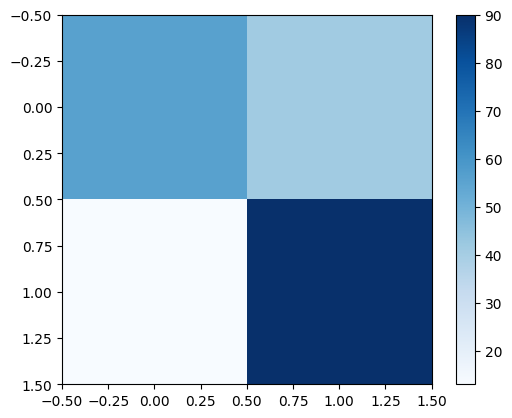

In [41]:
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.show()


In [42]:
from sklearn.metrics import accuracy_score


In [43]:
score=accuracy_score(y_test, y_pred)

In [44]:
score

0.73

### NEW COMMENTS LIST

In [45]:
new_comments = [
    "Best steak I've ever had! Cooked to perfection and seasoned just right. We'll definitely be back.",
    "The food here is absolutely amazing! The flavors are so rich and authentic. I highly recommend the pasta dishes.",
    "Waited over an hour for our food, and when it finally arrived, it was undercooked. Such a letdown.",
    "Lovely ambiance and fantastic vegetarian options. The chef clearly puts a lot of thought into each dish.",
    "Very disappointed. The restaurant was noisy, and our table was dirty. The staff seemed indifferent to our complaints.",
    "A hidden gem in the city! The seafood is incredibly fresh, and the wine selection is top-notch.",
    "Terrible experience. The food was cold, and the service was incredibly slow. I won't be returning.",
    "Excellent service and a cozy atmosphere. The staff went above and beyond to make our dining experience memorable.",
    "Overpriced for the quality. The portions were small, and the flavors were bland. Not worth it.",
    "The menu looked promising, but the dishes were a huge disappointment. Everything tasted like it came from a microwave."
]

In [46]:
new_comments = pd.Series(new_comments)


In [47]:
def preprocess_textgpt(text):
    # Remove punctuation and convert to lowercase
    transformed_input = ''.join([re.sub('[^a-zA-Z0-9\s]', '', char) for char in text])
    transformed_input = transformed_input.lower()
    transformed_input = transformed_input.split()
    stemmed_and_filtered = [ps.stem(word) for word in transformed_input if word.lower() not in set(stopwords.words('english'))]
    stemmed_and_filtered_string = ' '.join(stemmed_and_filtered)
    
    return stemmed_and_filtered_string

In [48]:
def preprocess_comments(comments):
    preprocessed_comments = [preprocess_textgpt(comment) for comment in comments]
    return preprocessed_comments

In [49]:
preprocessed_comments = preprocess_comments(new_comments)

In [50]:
preprocessed_comments

['best steak ive ever cook perfect season right well definit back',
 'food absolut amaz flavor rich authent highli recommend pasta dish',
 'wait hour food final arriv undercook letdown',
 'love ambianc fantast vegetarian option chef clearli put lot thought dish',
 'disappoint restaur noisi tabl dirti staff seem indiffer complaint',
 'hidden gem citi seafood incred fresh wine select topnotch',
 'terribl experi food cold servic incred slow wont return',
 'excel servic cozi atmospher staff went beyond make dine experi memor',
 'overpr qualiti portion small flavor bland worth',
 'menu look promis dish huge disappoint everyth tast like came microwav']

In [51]:
X_comment = cv.transform(preprocessed_comments).toarray()
y_pred_comment = classifier.predict(X_comment)


In [52]:
#X_input

In [53]:
y_pred_comment

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [56]:
actual = [1, 1, 0, 1, 0, 1, 0, 1, 0, 0]

# Tahmin değerlerini ve karşılaştırma değerlerini karşılaştır
for real, prediction in zip(actual, y_pred_comment):
    if real == prediction:
        print(f"Real: {real}, Prediction: {prediction} - TRUE")
    else:
        print(f"Real: {real}, Prediction: {prediction} - FALSE")

Real: 1, Prediction: 1 - TRUE
Real: 1, Prediction: 1 - TRUE
Real: 0, Prediction: 0 - TRUE
Real: 1, Prediction: 1 - TRUE
Real: 0, Prediction: 0 - TRUE
Real: 1, Prediction: 1 - TRUE
Real: 0, Prediction: 0 - TRUE
Real: 1, Prediction: 1 - TRUE
Real: 0, Prediction: 0 - TRUE
Real: 0, Prediction: 1 - FALSE


### USER INPUT TEST

In [55]:
#user_input = input("Test etmek istediğiniz veriyi girin: ")
#processed_input = preprocess_textgpt(user_input)
#X_input = cv.transform([processed_input]).toarray()
#prediction = classifier.predict(X_input)
#
#if prediction == 1:
#    print("MICHELIN STAR RESTAURANT")
#else:
#    print("NOT A MICHELIN STAR RESTAURANT")